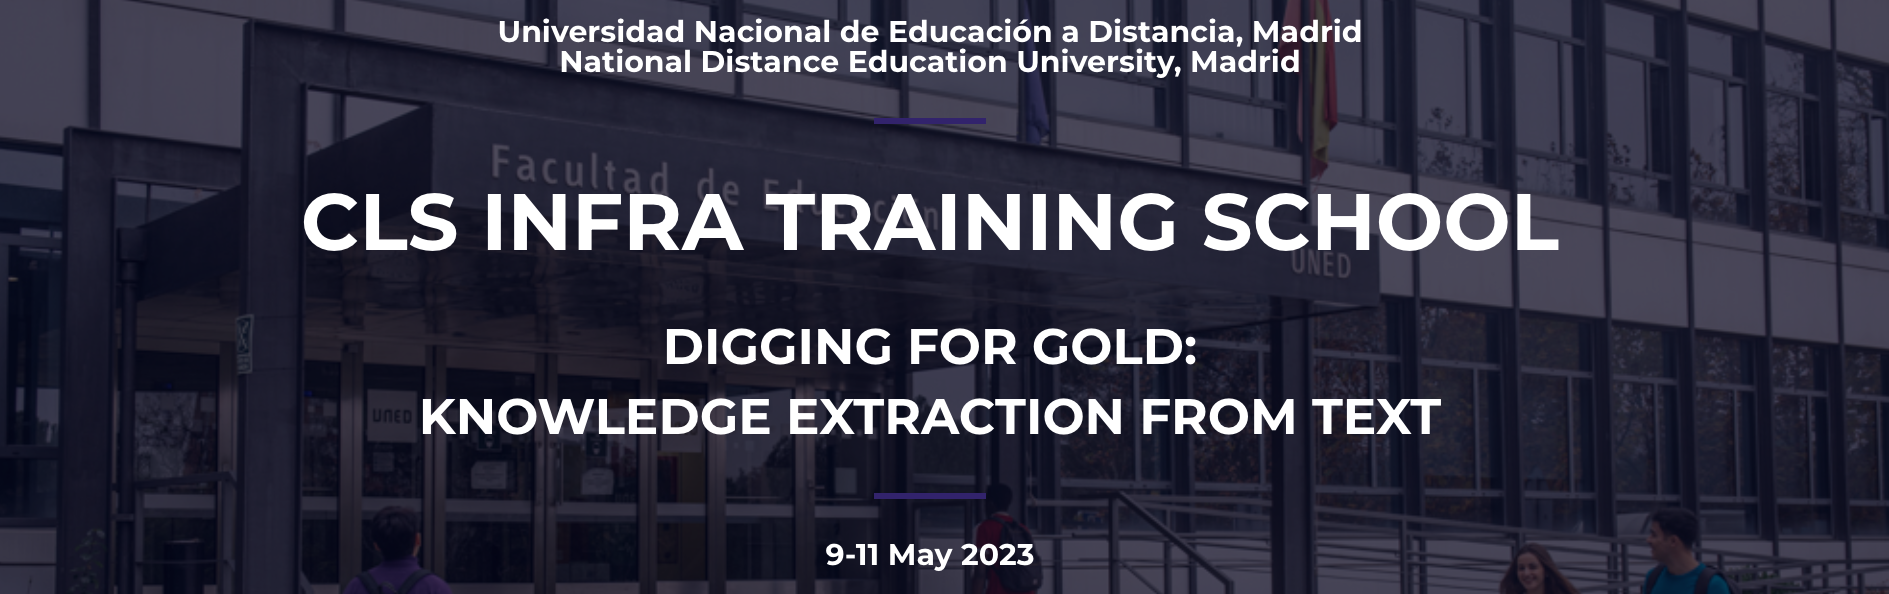

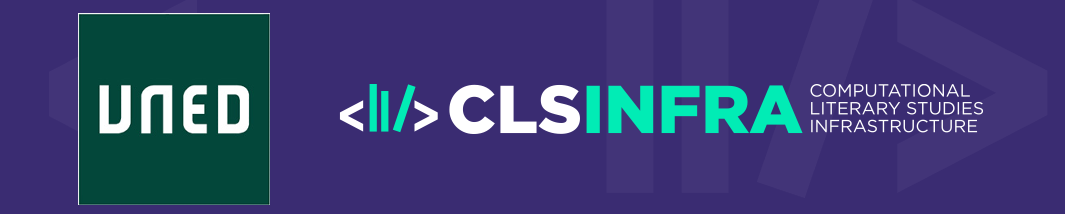

# Digging for Gold: Knowledge Extraction from Text
## CLS Training School , May, 2023
## Introduction to Information Extraction 

Welcome to Digging for Gold!
This is a hands-on workshop focusing on various foundation techniques for Natural Language Processing and their applications in Digital Humanities and beyond. 

To follow along, you can run the script portions piecemeal, in order, as we progress through the workshop material. Up to you. Familiarity with programming concepts and Python is required; Numpy and Jupyter desirable.

Instructor:


<figure>
        <div align="center">
            <img src="http://postdata.linhd.uned.es/wp-content/uploads/2016/06/salva.png", width="300" height="300",
         alt="Salva's picture">
    <figcaption>
        <strong>Salvador Ros</strong>
        <br/>
        <em>sros@scc.uned.es</em>, <em><a href="https://twitter.com/srosmu">@srosmu</a></em>
        <br/>
        Assitant Professor  at <a href="https://www.uned.es/">UNED</a>
       </div>
    </figcaption>
</figure>

# SECOND STEP: CLEAN UP TEXT

We can clean up a text in different ways. The most common method is using regular exprexions. In python we can use `re` module.

https://docs.python.org/3/library/re.html

# 1 Regular Expressions in Python
### Table of contents:
[**Regexp cheatsheet**](https://github.com/sros-UNED/NLPforHumanist/blob/master/Regex_Cheatsheet.pdf)
0. **sub()**
1. **match()**
2. **search()**
3. **findall()**
4. **finditer()**
5. **split()**
6. **Groups**

## ***The clean Up process is like to paint a picture, maybe 20% technique , maybe 80% creativity. You have to know what you want to obtain at the end of the process.***


# 2 Building Regular expresions 





## a) Simple regular expressions

###We put in braquets characters we want to match

e.g [L|l]it[t|z]le. 

Python help us with some funtions to use regular expressions.

## b) Complex regular expression 
### We can define  GROUPS. 
A group is all the characters that match a regular expression defines in  parentheses. Each group defines a search pattern

   e.g. ( [A-Z] + ) ,( [0-9] + [A-Z] )
    
The string is formed by a cero or more capital letters A-Z 
followed by a white space and a coma followed by cero or more 
figures and end in a capital letter.
    
    + Cero or more times
    [A-Z] Letters A,B.....Z
    [0-9] digit 0,1,...9


## c) **Regexp cheatsheet:**


**\d**

    Matches any decimal digit; this is equivalent to the class [0-9].
**\D**

    Matches any non-digit character; this is equivalent to the class [^0-9].
**\s**

    Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v].
**\S**

    Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v].
**\w**

    Matches any alphanumeric character; this is equivalent to the class [a-zA-Z0-9_].
**\W**

    Matches any non-alphanumeric character; this is equivalent to the class [^a-zA-Z0-9_].
    \*	cero or more, similar to {0,}.

**\+**

    one or more, similar to {1,}.

**?**

    cero or one, similar to {0,1}.

**{n}**	

    Exactly the specified number of occurrences

**{n,}**

    At least the specified number of occurrences.

**{n,m}**	
    
    Al least n number of occurrences but not more than  m number of occurrences.

**\[\]**
    
    A set of characters	"[a-m]"	

**\\**

    Signals a special sequence (can also be used to escape special characters)	"\d"	

**.**	

    Any character (except newline character)	"he..o"	

**^**
    
    Starts with	"^hello"	
	
**|**	

    Either or	"falls|stays"	

**()**	

    Capture and group	 


https://docs.python.org/3/library/re.html

# 3 How to built regular expression ?: CODE

In [1]:
import re

## 1.-function sub()
Searches for a substring and replaces it with another string

In [2]:
text="XXXXX largest Analytics community of India."

# Replacing a substring using sub()
result=re.sub('India', 'the World',text)
print(result)

XXXXX largest Analytics community of the World.


In [ ]:
text = """http://gutember-project.org la 123.245.78.9 \n\n Call me Ishmael.% Some years ago—never mind how long precisely—having % littLe or no money in / my purse, and nothing particular to  -- interest me
  on    shore, I    thought I would sail about \n a little- Little litzle and % see the watery part
of the world.  NOTE ,999A  """

text = re.sub(r'%', '', text)
text = re.sub(r'/', '', text)
text = re.sub(r'-', '', text)

In [ ]:
text

'http:gutemberproject.org la 123.245.78.9  Call me Ishmael. Some years ago—never mind how long precisely—having  littLe or no money in  my purse, and nothing particular to   interest me  on    shore, I    thought I would sail about  a little Little litzle and  see the watery partof the world.  NOTE ,999A  '

In [ ]:
text = re.sub(r'\n', '', text)

We can look for a pattern and replace it for another string

* e.g. cero or more tabs replace by blank `r'\t+', ' '`

* e.g. Carriage return replace by blank `r'\n', ''`

In [ ]:
text = re.sub(r'\t+', ' ', text)
text = re.sub(r'\n{2,}', '', text)
text = re.sub(r' {2,}', ' ', text)

Any sequence of two or more spaces should be converted into one space

Additionally, we can remove any carriage return

In [ ]:
text = re.sub(r'\n', '', text)

In [ ]:
text

'Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery partof the world.'

## 2.-match()
Checks for a match ***only at the beginning*** of the string

In [4]:
# Defining a string
string = " Tiger is the national animal of India. The tiger lives in Forest."

# Defining the pattern
pattern = "Tiger"

# Running match() on a string
result = re.match(pattern, string)

# Printing the result
print(result)
type(result)

#What it is happening?

<re.Match object; span=(0, 5), match='Tiger'>


re.Match

We have a class Match if we want to access to the data..

In [ ]:
# Defining a string
string = "Tiger is the national animal of India.  lives in Forest."

# Defining the pattern
pattern = "Tiger"

# Extracting String from a match object
result = re.match(pattern, string).group()

# Printing the result
print(result)
type(result)

Tiger


str

In [ ]:
string = "The national animal of India is Tiger. Tiger lives in Forest."
pattern = "Tiger"

# Checking for match
result = re.match(pattern, string)
print(result)

None


## 3.-search()
Locates a sub-string matching the RegEx pattern **anywhere** in the string

In [ ]:
string = "The national animal of is Tiger. Tiger lives in Forest."
pattern = "Tiger"

# Searching a substring using search()
result = re.search(pattern, string)
print(result)
type(result)

<re.Match object; span=(26, 31), match='Tiger'>


re.Match

In [ ]:
string = "The national animal of India is Tiger. Tiger lives in Forest."
pattern = "Tiger"

# Extracting searched string
result = re.search(pattern, string).group()

print(result)
type(result)

Tiger


str

## 4.-findall()
Finds all the sub-strings matching the RegEx pattern

In [ ]:
string = "The national animal of India is Tiger. Tiger lives in Forest."
pattern = "Tiger"

# Using findall() on a string
result = re.findall(pattern, string)
print(result)

['Tiger', 'Tiger']


In [ ]:
# Defining the string
text = "India got freedom on 15-08-1947, and it is celebrated as Independence Day.\
        Indian Constitution came into effect on 26-01-1950, and it is celebrated as Republic Day."

# Defining the pattern
date_pattern = r'\d{2}-\d{2}-\d{4}'

# Extracting dates using findall()
re.findall(date_pattern, text)

['15-08-1947', '26-01-1950']

In [ ]:
# Defining the string
text = """http://gutember-project.org la 123.245.78.9  Call me Ishmael. Some years ago—never mind how long precisely—having % littLe or no money in / my purse, and nothing particular to  -- interest me
  on    shore, I    thought I would sail about a little Little litzle and see the watery part
of the world.  NOTE ,999A  """
# Defining the pattern
text_pattern = r'[L|l]it[t|z]le'    
#date_pattern = r'[Ll]it[tz]le'      
data=re.findall(text_pattern,text) 
data  

['little', 'Little', 'litzle']

In [ ]:
data1=re.findall("([A-Z]+) ,([0-9]+[A-Z])",text)
data1


[('NOTE', '999A')]

## 5.-finditer()
Similar to findall() but returns an iterator

In [ ]:
string = "The national animal of India is Tiger. Tiger lives in Forest."
pattern = "Tiger"

# Using finditer() on a string
result = re.finditer(pattern, string)
print(result)

# Iterating over the iterator
for m in result:
    # Printing match object
    print(m)
    # Printing starting and ending index with matched substring
    print('Start:',m.start(),' End:',m.end(),' Sub-string:',m.group())

<re.Match object; span=(32, 37), match='Tiger'>
Start: 32  End: 37  Sub-string: Tiger
<re.Match object; span=(39, 44), match='Tiger'>
Start: 39  End: 44  Sub-string: Tiger


## 6.- split()
Split the text by the given RegEx Pattern

In [ ]:
line = "I have a big test tomorrow; I can't go out tonight."

# Splitting a string into multiple substrings
re.split(r'[;]', line)

['I have a big test tomorrow', " I can't go out tonight."]

## 7.- Strip()

Let´s start removing the  whitespaces at the begining an the end of the sentence 
We will use **strip()*** method.

In [ ]:
text1='   http:gutemberproject.org la 123.245.78.9 Call me Ishmael. Some years ago—never mind how long precisely—having littLe or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little Little litzle and see the watery partof the world. NOTE ,999A'

In [ ]:
text1 = text.strip()

In [ ]:
text1

'http:gutemberproject.org la 123.245.78.9 \n\n Call me Ishmael. Some years ago—never mind how long precisely—having  littLe or no money in  my purse, and nothing particular to   interest me\n  on    shore, I    thought I would sail about \n a little Little litzle and  see the watery part\nof the world.  NOTE ,999A'

# 4 Building our own Clean up text function !! 

In [5]:
def clean_text(string1):
    output = string1.strip()
    replacements = (
      ("“", ''), ("”", ''), ("//", ""), ("«", ''), ("»", ''), (",", ''),
      (";", ''), (".", ''),
    )
    for replacement in replacements:
        output = output.replace(*replacement)
    # Any sequence of two or more spaces should be converted into one space
    output = re.sub(r'\t+', ' ', output)
    output = re.sub(r'\n{2,}', '', output)
    output = re.sub(r' {2,}', ' ', output)  
    output = re.sub(r'\n', ' ', output)
    return output.strip()

In [6]:
text = """http://gutember-project.org la 123.245.78.9  Call me Ishmael. Some years ago—never mind how long precisely—having % littLe or no money in / my purse, and nothing particular to  -- interest me
  on    shore, I    thought I would sail about a little Little litzle and see the watery part
of the world.  NOTE ,999A  """
text = clean_text(text)

In [7]:
text

'http:gutember-projectorg la 123245789 Call me Ishmael Some years ago—never mind how long precisely—having % littLe or no money in / my purse and nothing particular to -- interest me  on shore I thought I would sail about a little Little litzle and see the watery part of the world NOTE 999A'

## EXERCISE 1
Complete the clean text function to take into account

    a)\n
    b) /
    c)%
    d) two o more -


In [ ]:
def clean_text(string1):
    output = string1.strip()
    replacements = (
      ("“", ''), ("”", ''), ("//", ""), ("«", ''), ("»", ''), (",", ''),
      (";", ''), (".", ''), ("_ _ _ ", ''), ("_ _ _ _ ", ''), ("_ _ _ _ _",''),
    )
    for replacement in replacements:
        output = output.replace(*replacement)
    # Any sequence of two or more spaces should be converted into one space
    output = re.sub(r'\t+', ' ', output)
    output = re.sub(r'\n{2,}', '', output)
    output = re.sub(r' {2,}', ' ', output)
    output = re.sub(r'-{2,}', '', output)    
    output = re.sub(r'_ _ _', '', output)     
    return output.strip()

# 5 Groups

In [ ]:
# Running a simple pattern on some text
string="Ajay credited $500 to your account on 13-08-2020.\
      Anmol debited $1,700 from your account on 14-08-2020.\
      Alex debited $100 on 16-08-2020 from your account."

pattern="[\w]+ [\w]+ \$[\d,]+ [a-zA-z ]+ \d{2}-\d{2}-\d{4}"

result=re.findall(pattern,string)

print(result)
type(result)

['Ajay credited $500 to your account on 13-08-2020', 'Anmol debited $1,700 from your account on 14-08-2020', 'Alex debited $100 on 16-08-2020']


list

In [ ]:
string="Ajay credited $500 to your account on 13-08-2020.\
      Anmol debited $1,700 from your account on 14-08-2020.\
      Alex debited $100 on 16-08-2020 from your account."

# Creating groups in the previous pattern
pattern="([\w]+) ([\w]+) (\$[\d,]+) [a-zA-z ]+ (\d{2}-\d{2}-\d{4})"

result=re.findall(pattern,string)

print(result)
type(result)

[('Ajay', 'credited', '$500', '13-08-2020'), ('Anmol', 'debited', '$1,700', '14-08-2020'), ('Alex', 'debited', '$100', '16-08-2020')]


list

In [ ]:
import pandas as pd

# Creating a dataframe
df=pd.DataFrame(result,columns=['Name','Type','Amount','Date'])
df

,Name,Type,Amount,Date
0,Ajay,credited,$500,13-08-2020
1,Anmol,debited,"$1,700",14-08-2020
2,Alex,debited,$100,16-08-2020


In [10]:
# Using finditer() for getting match objects
string="Ajay credited $500 to your account on 13-08-2020.\
      Anmol debited $1,700 from your account on 14-08-2020.\
      Alex debited $100 on 16-08-2020 from your account."

pattern="([\w]+) ([\w]+) (\$[\d,]+) ([a-zA-z ]+) (\d{2}-\d{2}-\d{4})"

result=re.finditer(pattern,string)

# Accessing groups separately
for i in result:
    print('groups',i.group(0),'=>',i.group(1),'=>',i.group(2),'=>',i.group(3),'=>',i.group(4),'=>',i.group(5),'\n' )
    print('position groups',i.start(0),'=>',i.end(0), i.start(1),'=>',i.end(1),'\n','\n')

groups Ajay credited $500 to your account on 13-08-2020 => Ajay => credited => $500 => to your account on => 13-08-2020 

position groups 0 => 48 0 => 4 
 

groups Anmol debited $1,700 from your account on 14-08-2020 => Anmol => debited => $1,700 => from your account on => 14-08-2020 

position groups 55 => 107 55 => 60 
 

groups Alex debited $100 on 16-08-2020 => Alex => debited => $100 => on => 16-08-2020 

position groups 114 => 145 114 => 118 
 



**If I want to give names to the groups** Syntax for naming groups: `(?P<Group Name>Pattern)`

In [ ]:
string="Ajay credited $500 to your account on 13-08-2020.\
      Anmol debited $1,700 from your account on 14-08-2020.\
      Alex debited $100 on 16-08-2020 from your account."

# Naming Groups
pattern="(?P<Name>[\w]+) (?P<Type>[\w]+) (?P<Amount>\$[\d,]+) [a-zA-z ]+ (?P<Date>\d{2}-\d{2}-\d{4})"
result=re.finditer(pattern,string)

#result=list(re.finditer(pattern,string))

In [ ]:
# Accessing data by group names
for i in result:
    print('groups',i.group('Name'),'=>',i.group('Amount'),'=>',i.group('Date'),'=>',i.group('Type'))

Ajay => $500 => 13-08-2020 => credited
Anmol => $1,700 => 14-08-2020 => debited
Alex => $100 => 16-08-2020 => debited


## EXERCISE 2
Design a Regular expresion to detect a URL.

In [9]:
import re 
#CHECK https://regex101.com/
text = """la http://gutember-project.org/ la 123.245.78.9  Call me Ishmael. Some years ago—never mind how long precisely—having % littLe or no money in / my purse, and nothing particular to  -- interest me
  on    shore, I    thought I would sail about a little Little litzle and see the watery part
of the world.  NOTE ,999A  """
url='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
data1=re.findall(url,text)
print(data1)

print(text)


['http://gutember-project..org/']
la http://gutember-project..org/ la 123.245.78.9  Call me Ishmael. Some years ago—never mind how long precisely—having % littLe or no money in / my purse, and nothing particular to  -- interest me
  on    shore, I    thought I would sail about a little Little litzle and see the watery part
of the world.  NOTE ,999A  


http[s]?:// makes sure the string starts with either http or https followed by ://.

(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F])

indicates alphanumeric characters and/or special characters. 


#### Summary of what was learned

Summary of the terms learned. Review them and make sure you understand them all.

-  loop
- `for` expression
- iterable objects
- assign values to a variable with a `for` loop